<div style="text-align: center;">
  <h3>Assignment 2</h3>
  <h3>19ECE312</h3>
</div>

<div style="text-align: right; ">
<p>Anton Rejoe P</p>
<p>CB.EN.U4ECE22009</p>
<p>Deadline: 25 March 2025</p>
</div>


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate Info


In [3]:
# Create an array with 500 zeros and 500 ones
array_size = 10000
half_size = array_size // 2

# Create the array
info = np.array([0] * half_size + [1] * half_size)

# Shuffle the array to randomize the order
np.random.shuffle(info)


info = np.resize(info ,( array_size//4, 4))
info

array([[1, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 1, 0, 1],
       ...,
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 0]], shape=(2500, 4))

# Create Generator Matrix


In [4]:
import numpy as np

def create_generator_matrix(k, n,info, hamming=True):
    """
    Create a generator matrix for a (n, k) Hamming code using the provided info array.
    
    Args:
    k (int): Number of information bits (for Hamming code, k = 4).
    n (int): Total number of bits in the codeword (for Hamming code, n = 7).
    info (np.ndarray): Array of information vectors.
    
    Returns:
    np.ndarray: Generator matrix G.
    np.ndarray: Parity matrix P.
    """

    if hamming:
        I_k = np.eye(k, dtype=int)
        P = np.array([
            [1, 1, 0],  # d1 contributes to p1 and p2
            [1, 0, 1],  # d2 contributes to p1 and p3
            [0, 1, 1],  # d3 contributes to p2 and p3
            [1, 1, 1]   # d4 contributes to all parity bits
        ], dtype=int)

        # Concatenate I_k and P to form the generator matrix G
        G = np.concatenate((I_k, P), axis=1)
        return G, P
    else:
        # Create the identity matrix I_k
        I_k = np.eye(k, dtype=int)
        
        # Initialize the parity matrix P
        P = np.zeros((k, n - k), dtype=int)

        # Compute parity bits based on the info array
        for row_idx in range(k):
            # Get the corresponding information vector from the info array
            i = info[row_idx]  # This is a row vector corresponding to data bits
            
            # Calculate parity bits using Hamming code equations
            p0 = (i[0] + i[1] + i[3]) % 2  # p1 = d1 + d2 + d4 mod 2
            p1 = (i[0] + i[2] + i[3]) % 2  # p2 = d1 + d3 + d4 mod 2
            p2 = (i[1] + i[2] + i[3]) % 2  # p3 = d2 + d3 + d4 mod 2
            
            # Assign the computed parity bits to the corresponding row in P
            P[row_idx] = [p0, p1, p2]

        # Concatenate I_k and P to form the generator matrix G
        G = np.concatenate((I_k, P), axis=1)
        
        return G, P

In [5]:
# Example usage
k = 4  # Number of information bits
n = 7  # Total number of bits in the codeword
G,P = create_generator_matrix(k, n, info, hamming=True)
print("Generator Matrix G:")
print(G)
print(G.shape)

Generator Matrix G:
[[1 0 0 0 1 1 0]
 [0 1 0 0 1 0 1]
 [0 0 1 0 0 1 1]
 [0 0 0 1 1 1 1]]
(4, 7)


# Encode message


In [6]:
def encode_message(message, G):
    codeword = np.dot(message, G) % 2  # Modulo 2 for binary code
    return codeword

In [7]:
encoded_msg = encode_message(info,G)
display(encoded_msg)

array([[1, 0, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 1, 0]], shape=(2500, 7))

# Modulate message


In [8]:
def modulation(encoded_msg):
    code_word = np.array([ (1-2*i) for i in encoded_msg ])
    return code_word

code_word = modulation(encoded_msg)
display(code_word)

array([[-1,  1, -1, ..., -1,  1, -1],
       [ 1,  1, -1, ..., -1,  1,  1],
       [-1, -1,  1, ..., -1,  1,  1],
       ...,
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ..., -1, -1,  1]], shape=(2500, 7))

# Add AWGN


In [9]:
import numpy as np

# Function to add AWGN
def add_awgn(code_words, eb_n0_db):
    # Convert Eb/N0 from dB to linear scale
    eb_n0 = 10 ** (eb_n0_db / 10)
    
    # Calculate the energy per bit (Eb)
    # Assuming each codeword is a row vector
    eb = np.mean(np.square(code_words))  # Average energy of the codeword
    
    # Calculate noise variance (N0/2)
    n0 = eb / eb_n0  # N0 = Eb / (Eb/N0)
    
    # Generate AWGN noise
    noise = np.random.normal(0, np.sqrt(n0), code_words.shape)  # Mean=0, StdDev=sqrt(N0/2)
    
    # Add noise to codewords
    noisy_codewords = code_words + noise
    
    return noisy_codewords


# Desired Eb/N0 in dB
eb_n0_db = 5

# Add AWGN to the code words
noisy_codewords = add_awgn(code_word.copy(), eb_n0_db)

print("Noisy Codewords:")
print(noisy_codewords)


Noisy Codewords:
[[-7.46096254e-01  1.22916159e+00 -7.01264144e-01 ... -5.95643526e-01
   8.18656233e-01 -8.44819853e-01]
 [ 1.22435759e+00  5.12796679e-01 -3.83423096e-01 ... -7.22016514e-01
   9.50873585e-01  2.33320121e+00]
 [-1.28610299e+00 -1.08193479e+00  1.45693277e+00 ... -1.55607946e+00
  -8.15773335e-01  3.51624316e-01]
 ...
 [-5.85833239e-01  7.61816456e-01  1.12518150e+00 ...  1.71929822e+00
   7.53290297e-01 -1.27965177e+00]
 [-2.53151101e-01  8.19080771e-01  9.75864274e-01 ...  2.47494813e-01
   2.11362871e+00 -1.79735971e+00]
 [-1.09361849e+00  1.05732007e+00  5.02222912e-01 ... -1.63359033e+00
  -6.72964488e-01 -1.20239893e-05]]


# Recieve message


In [10]:
def detect_message(noisy_codeword):
    Threshold = 0
    return np.where(noisy_codeword < 0, -1, 1)
    
detected_msg = np.array([detect_message(i) for i in noisy_codewords])

detected_msg

array([[-1,  1, -1, ..., -1,  1, -1],
       [ 1,  1, -1, ..., -1,  1,  1],
       [-1, -1,  1, ..., -1, -1,  1],
       ...,
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ..., -1, -1, -1]], shape=(2500, 7))

# Decode message


In [11]:
def decode_msg(msg):
    return np.where(msg == 1 , 0, 1 )

In [12]:
def decode_msg_all(detected_msg):
    decoded_msg = np.zeros(detected_msg.shape)

    for i in range(len(detected_msg)):
        decoded_msg[i] = np.array([decode_msg(j) for j in detected_msg[i]])
    
    return decoded_msg

decoded_msg = decode_msg_all(detected_msg)
print(decoded_msg)

[[1. 0. 1. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 1. 1.]]


# Generate Parity check Matrix


In [13]:
## syndrome calculation
## H^T to be calculated

def parity_check_matrix_H(P):
    parity_matrix = P.copy()
    identity_matrix = np.eye(parity_matrix.shape[1], dtype=int)
    H_T = np.concatenate((parity_matrix, identity_matrix), axis=0)
    return H_T.astype(int)

H_T = parity_check_matrix_H(P)

H_T.shape
# G_shuffled.shape

(7, 3)

## Verify the Relationship $G⋅H^{T} = 0$


In [14]:
np.all((G @ H_T) % 2 == 0)  # Should return True

np.True_

# Calculate Syndrome


In [15]:
S = np.dot(decoded_msg, H_T) % 2
S = np.array(S, dtype=int)
S

array([[0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1]], shape=(2500, 3))

In [16]:
def calculate_error(S):
    No_of_errors = 0
    for syndrome_vector in S:
        if np.any(syndrome_vector == 1):
            No_of_errors += 1
    return No_of_errors

# Calculate Number of Errors


In [17]:
# code_word.shape, decoded_msg.shape
num_errors = calculate_error(S)
num_errors

615

In [18]:
code_word.shape
error_per = num_errors/(code_word.shape[0]*code_word.shape[1])  
error_per

0.03514285714285714

# Calculate Bit Error rate (BER)


## Without Error Correction


In [19]:
def perform_(info):
    Eb_n0 = np.arange(0, 11)
    Errors = np.zeros(Eb_n0.shape)

    G, P = create_generator_matrix(4, 7, info)
    G_s  = G
    codeword = encode_message(info, G_s)
    modulated = modulation(codeword)

    for i in range(len(Eb_n0)):
        modulated_noise = add_awgn(modulated, Eb_n0[i]) 
        noisy_codeword  = detect_message(modulated_noise)
        decoded_msg     = decode_msg_all(noisy_codeword)
        H_T             = parity_check_matrix_H(P)
        Syndromes       = np.dot(decoded_msg, H_T) % 2
        Syndromes       = np.array(Syndromes, dtype=int)
        num_errors      = calculate_error(Syndromes)
        error_per       =  (num_errors/(code_word.shape[0]*code_word.shape[1])) 
        Errors[i] = error_per
        print(error_per)

    return Errors, Eb_n0

0.0976
0.08771428571428572
0.07451428571428571
0.0656
0.04782857142857143
0.0348
0.0228
0.011485714285714285
0.005828571428571429
0.0029714285714285715
0.0006285714285714285


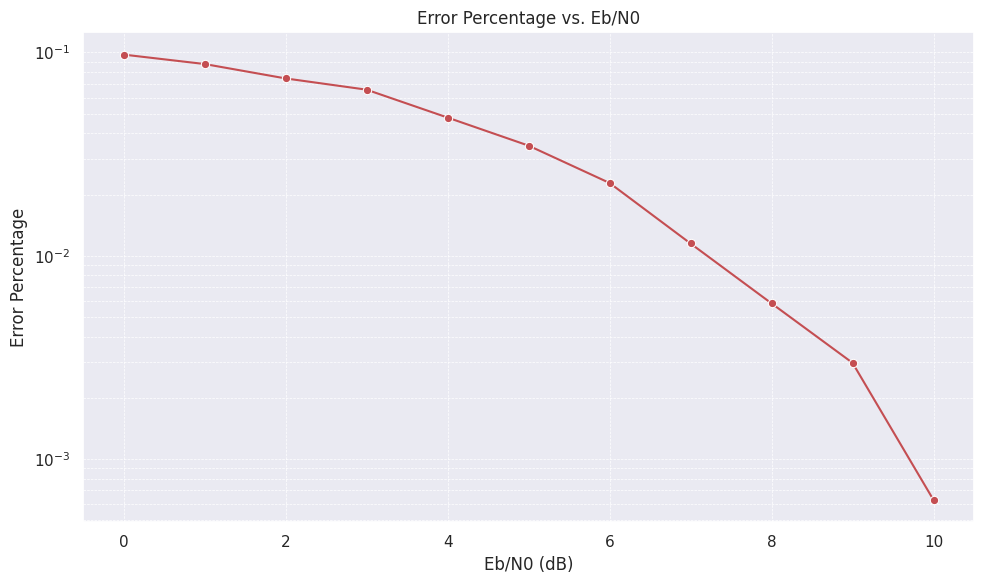

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming perform_() returns two lists or arrays
Errors, Eb_n0 = perform_(info)

# Create DataFrame
data = {'Eb/N0 (dB)': Eb_n0, 'Error Percentage': Errors}
df = pd.DataFrame(data)

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.set_theme(style="darkgrid")  # Set the plot style

sns.lineplot(x='Eb/N0 (dB)', y='Error Percentage', data=df, marker='o', color='r')  # Add markers for clarity

plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Error Percentage')
plt.title('Error Percentage vs. Eb/N0')

plt.yscale('log')  # Set y-axis to log scale

plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Show both major and minor grid lines
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


## Error correction


In [21]:
def perform_EC(decoded_msg, S, H_T):
    corrected_msg = np.array(decoded_msg, dtype=int)  # Ensure integer type
    for i in range(corrected_msg.shape[0]):
        syndrome = S[i]
        error_pos = None
        # Check each column in H_T to find a match with the syndrome
        for j in range(H_T.shape[1]):
            if np.array_equal(H_T[:, j], syndrome):
                error_pos = j
                break
        if error_pos is not None and error_pos < corrected_msg.shape[1]:
            corrected_msg[i, error_pos] ^= 1  # Flip the bit at the error position
    return corrected_msg



In [22]:
corrected_msg = perform_EC(decoded_msg, S, H_T)

## With Error Correction


In [23]:
def perform_after_ec(info):
    Eb_n0 = np.arange(0, 11)  # Eb/N0 values from 0 to 10 dB
    Errors = np.zeros(Eb_n0.shape)

    # Create generator matrix and parity-check matrix
    G, P = create_generator_matrix(4, 7, info)
    G_s = G
    codeword = encode_message(info, G_s)
    modulated = modulation(codeword)
    H_T = parity_check_matrix_H(P)  # Compute H_T once here

    for i in range(len(Eb_n0)):
        # Add AWGN noise to the modulated signal
        modulated_noise = add_awgn(modulated, Eb_n0[i]) 
        
        # Detect the message from the noisy signal
        noisy_codeword = detect_message(modulated_noise)
        
        # Decode the received codeword
        decoded_msg = decode_msg_all(noisy_codeword)
        
        # Calculate syndromes for the decoded message
        Syndromes = np.dot(decoded_msg, H_T) % 2
        Syndromes = np.array(Syndromes, dtype=int)
        
        # Perform error correction using the syndromes and H_T
        corrected_msg = perform_EC(decoded_msg, Syndromes, H_T)

        # Calculate syndromes for the corrected message
        Syndromes_crt = np.dot(corrected_msg, H_T) % 2
        Syndromes_crt = np.array(Syndromes_crt, dtype=int)
        
        # Count the number of errors in the corrected message
        num_errors = calculate_error(Syndromes_crt)
        
        # Calculate the error probability
        error_per = num_errors / (codeword.shape[0] * codeword.shape[1]) 
        Errors[i] = error_per
        
        print(f"Eb/N0: {Eb_n0[i]} dB, Error Probability: {error_per}")

    return Errors, Eb_n0

## Plotting after Error Correction


Eb/N0: 0 dB, Error Probability: 0.09731428571428571
Eb/N0: 1 dB, Error Probability: 0.088
Eb/N0: 2 dB, Error Probability: 0.07325714285714285
Eb/N0: 3 dB, Error Probability: 0.06142857142857143
Eb/N0: 4 dB, Error Probability: 0.045714285714285714
Eb/N0: 5 dB, Error Probability: 0.03371428571428572
Eb/N0: 6 dB, Error Probability: 0.021085714285714284
Eb/N0: 7 dB, Error Probability: 0.011942857142857142
Eb/N0: 8 dB, Error Probability: 0.0054285714285714284
Eb/N0: 9 dB, Error Probability: 0.0018857142857142857
Eb/N0: 10 dB, Error Probability: 0.0008571428571428571


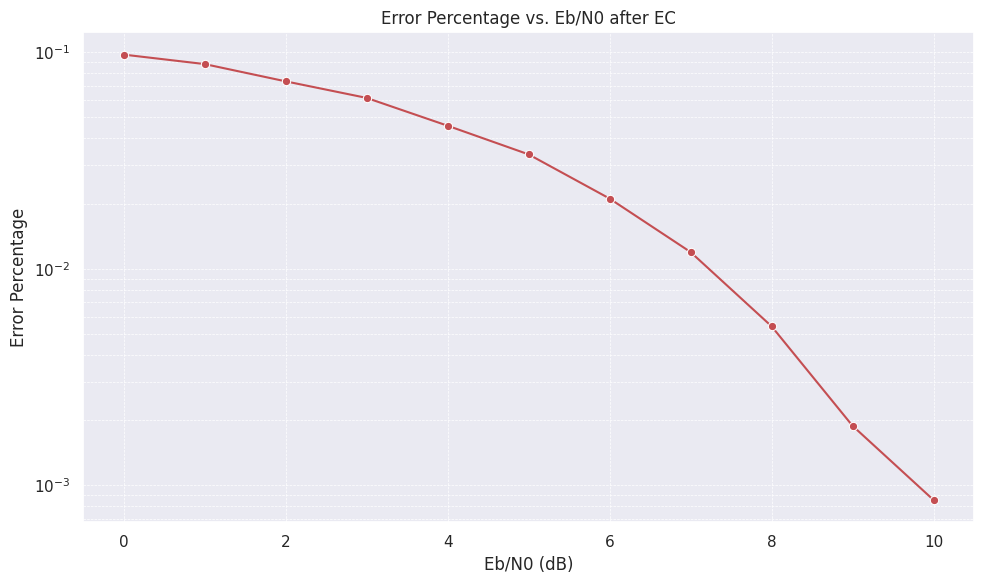

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming perform_() returns two lists or arrays
Errors_ec, Eb_n0 = perform_after_ec(info)

# Create DataFrame
data = {'Eb/N0 (dB)': Eb_n0, 'Error Percentage': Errors_ec}
df = pd.DataFrame(data)

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.set_theme(style="darkgrid")  # Set the plot style

sns.lineplot(x='Eb/N0 (dB)', y='Error Percentage', data=df, marker='o', color='r')  # Add markers for clarity

plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Error Percentage')
plt.title('Error Percentage vs. Eb/N0 after EC')

plt.yscale('log')  # Set y-axis to log scale

plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Show both major and minor grid lines
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Comparsion


**Before Error Correction**

| Eb/N0 (dB) | Error Probability     |
| ---------- | --------------------- |
| 0          | 0.09731428571428571   |
| 1          | 0.088                 |
| 2          | 0.07325714285714285   |
| 3          | 0.06142857142857143   |
| 4          | 0.045714285714285714  |
| 5          | 0.03371428571428572   |
| 6          | 0.021085714285714284  |
| 7          | 0.011942857142857142  |
| 8          | 0.0054285714285714284 |
| 9          | 0.0018857142857142857 |
| 10         | 0.0008571428571428571 |

**After Error Correction**

| Eb/N0 (dB) | Error Probability     |
| ---------- | --------------------- |
| 0          | 0.0976                |
| 1          | 0.08771428571428572   |
| 2          | 0.07451428571428571   |
| 3          | 0.0656                |
| 4          | 0.04782857142857143   |
| 5          | 0.0348                |
| 6          | 0.0228                |
| 7          | 0.011485714285714285  |
| 8          | 0.005828571428571429  |
| 9          | 0.0029714285714285715 |
| 10         | 0.0006285714285714285 |
